
Created: 26.06.2025

Author: Pippa Edwards

Sources used: cartopy and pyplot.colorbar documentation,  ChatGPT 

This code:
- plots the distribution of climatologies on a global scale of input data
- plots an overall global map of mu and sigma
- plots monthly climatology maps of mu and sigma


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import os 
os.chdir("C:/Users/pe1n24/Desktop/poc_data_070525/")

In [ ]:
#set up climatology with no time dimension
sst_ntd = xr.open_dataset("SST_notimedim_clim_2606.nc")["SST"]
chla_ntd = xr.open_dataset("occci_notimedim_climatology_regridded.nc")["chlor_a"]
chla_ntd = np.log(chla_ntd)
zeu = xr.open_dataset("z_eu_data_0207.nc")["z_eu"]
zeu = np.log(zeu)
zeu_ntd = zeu.mean(dim = "month")
zeu_ntd = zeu_ntd.transpose("lat", "lon")
zeu_ntd = zeu_ntd.sortby("lat")
zeu_ntd.to_netcdf("z_eu_data_notimedim_0207.nc")

ntd = xr.merge([sst_ntd, chla_ntd, zeu_ntd])

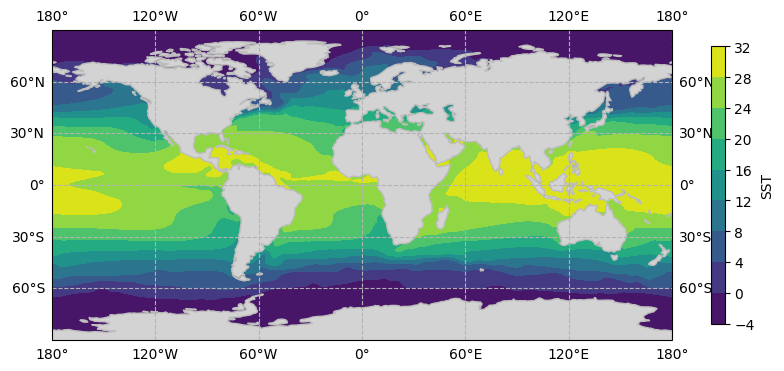

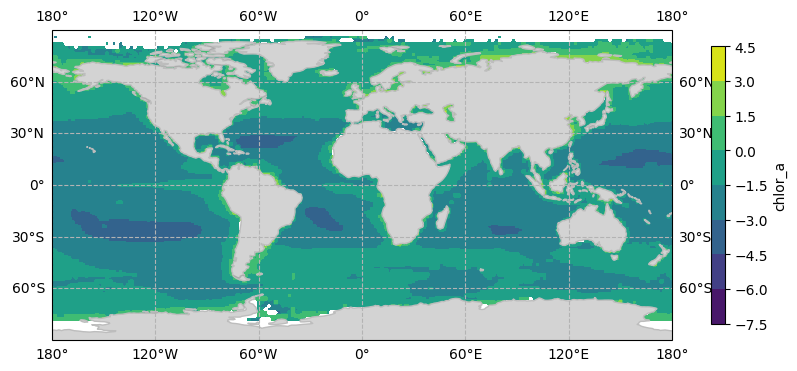

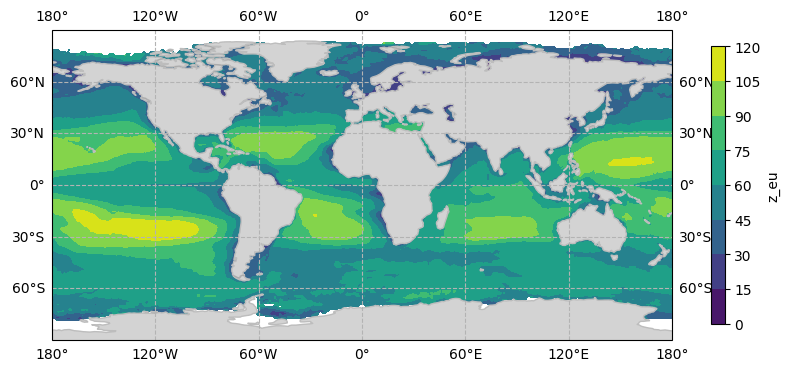

In [ ]:
#plot the predictor variables to check
lats = ntd["lat"]
lons = ntd["lon"]

vars = ["SST", "chlor_a", "z_eu"]

for v in range(len(vars)):
    var = vars[v]

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines('110m', alpha=0.1)
    ax.gridlines(draw_labels = True, linestyle = "--", color = "#B3B3B3")
    contour = ax.contourf(lons, lats, ntd[var], transform=ccrs.PlateCarree())

    cbar = plt.colorbar(contour, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
    cbar.set_label(var)

    land = cfeature.NaturalEarthFeature(
    'physical', 'land', '110m',
    edgecolor='face',
    facecolor='lightgrey'  # or 'grey' or any color you want
    )
    ax.add_feature(land, zorder=1)
    plt.show()

In [ ]:
#load in stan data
df = pd.read_csv("C:/Users/pe1n24/Desktop/STAN/output/final_data_stanrun.csv")
betas = df.filter(like = "beta")
gammas = df.filter(like = "gamma")

In [ ]:
#set up maps of sigma and mus

mumap = (np.mean(betas["beta[1]"])*np.ones((180,360)))+(np.mean(betas["beta[2]"])*ntd["SST"])+ (np.mean(betas["beta[3]"])*ntd["chlor_a"]) + (np.mean(betas["beta[4]"])*ntd["z_eu"])
sigmap = (np.mean(gammas["gamma[1]"])*np.ones((180,360)))+(np.mean(gammas["gamma[2]"])*ntd["SST"])+ (np.mean(gammas["gamma[3]"])*ntd["chlor_a"]) + (np.mean(gammas["gamma[4]"])*ntd["z_eu"])

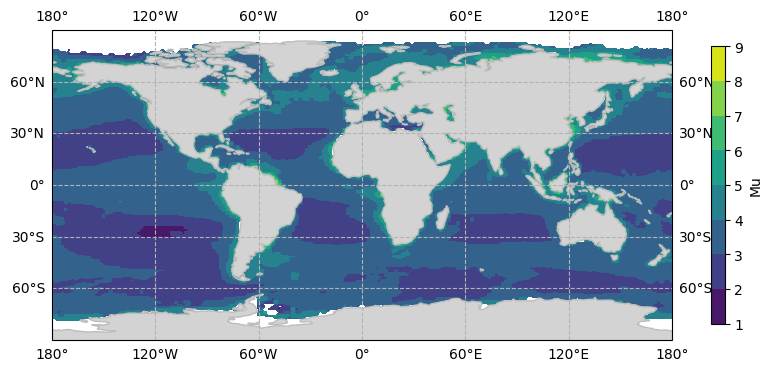

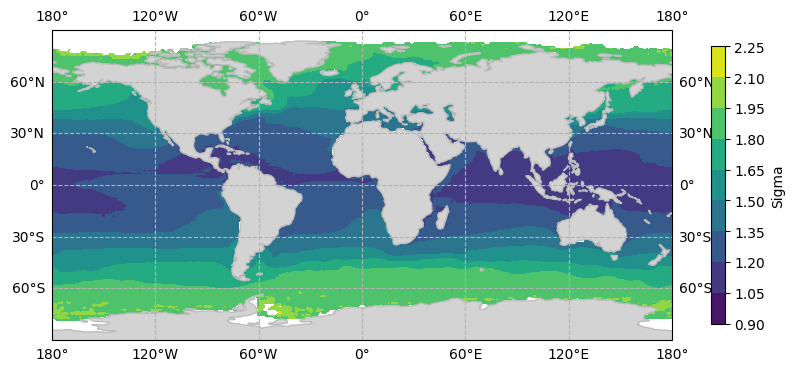

In [ ]:
#plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.1)
ax.gridlines(draw_labels = True, linestyle = "--", color = "#B3B3B3")
contour = ax.contourf(lons, lats, mumap, transform=ccrs.PlateCarree())

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label("Mu")

land = cfeature.NaturalEarthFeature(
'physical', 'land', '110m',
edgecolor='face',
facecolor='lightgrey'  # or 'grey' or any color you want
)
ax.add_feature(land, zorder=1)
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.1)
ax.gridlines(draw_labels = True, linestyle = "--", color = "#B3B3B3")
contour = ax.contourf(lons, lats, sigmap, transform=ccrs.PlateCarree())

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label("Sigma")

land = cfeature.NaturalEarthFeature(
'physical', 'land', '110m',
edgecolor='face',
facecolor='lightgrey'  # or 'grey' or any color you want
)
ax.add_feature(land, zorder=1)
plt.show()

In [ ]:
#Set up monthly datasets
sstm = xr.open_dataset("SST_monthly_clim_2606.nc")["SST"]
chlam = xr.open_dataset("occci_monthly_climatology_regridded.nc")["chlor_a"]
chlam = np.log(chlam)
zeum = xr.open_dataset("z_eu_data_0207.nc")["z_eu"]
zeum = np.log(zeum)
zeum = zeum.transpose("month", "lat", "lon", ...)
zeum = zeum.sortby("lat")


1


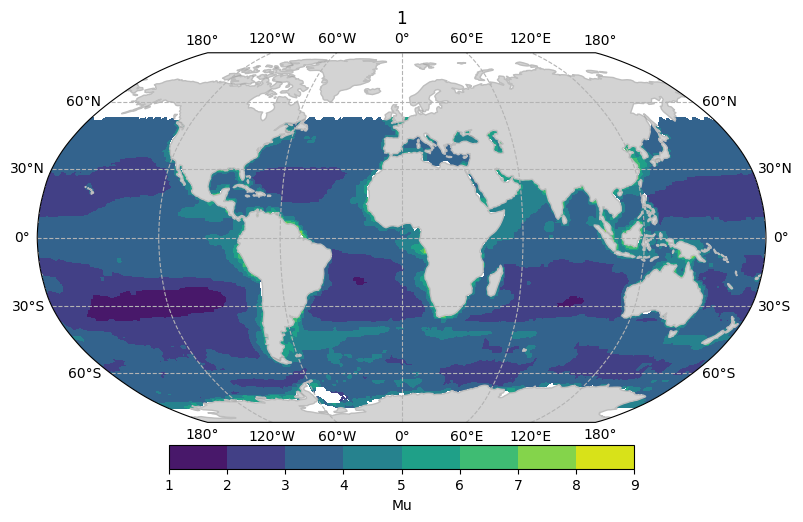

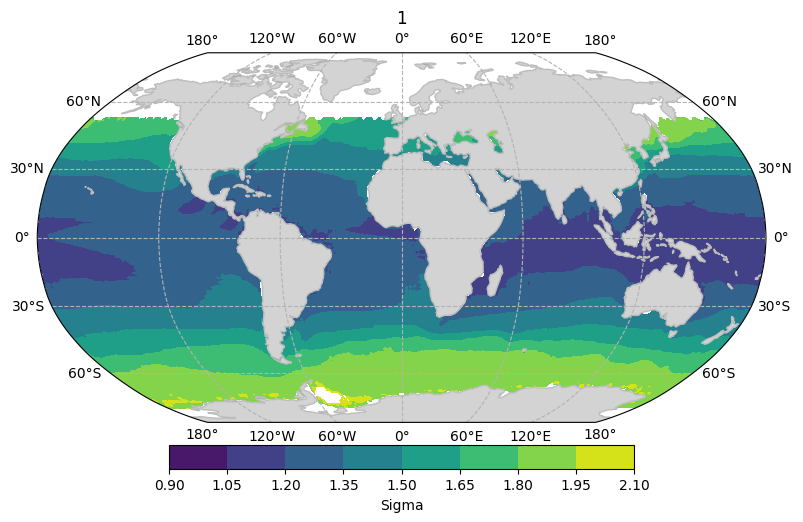

2


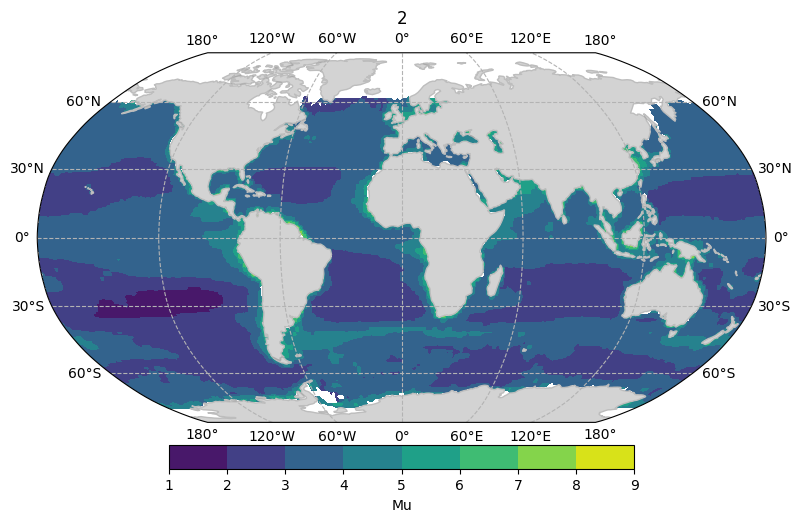

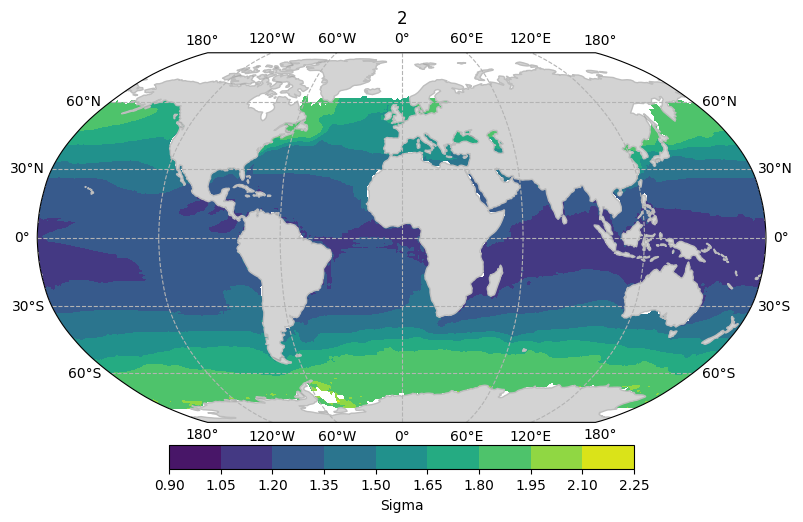

3


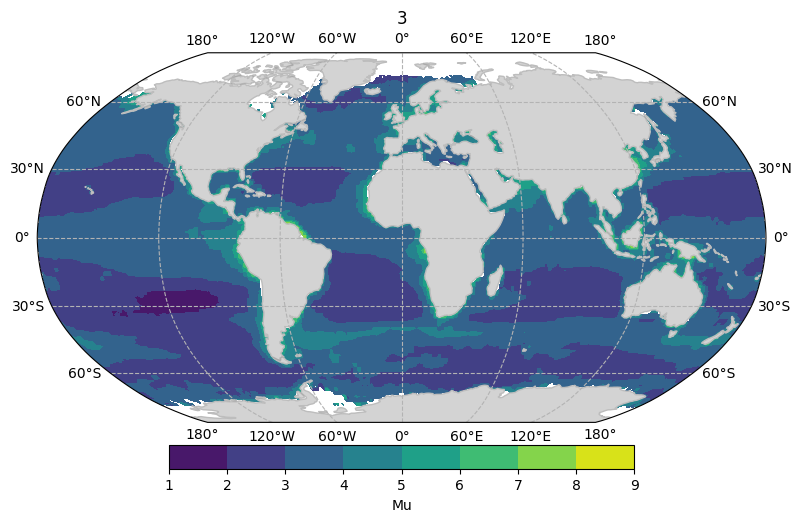

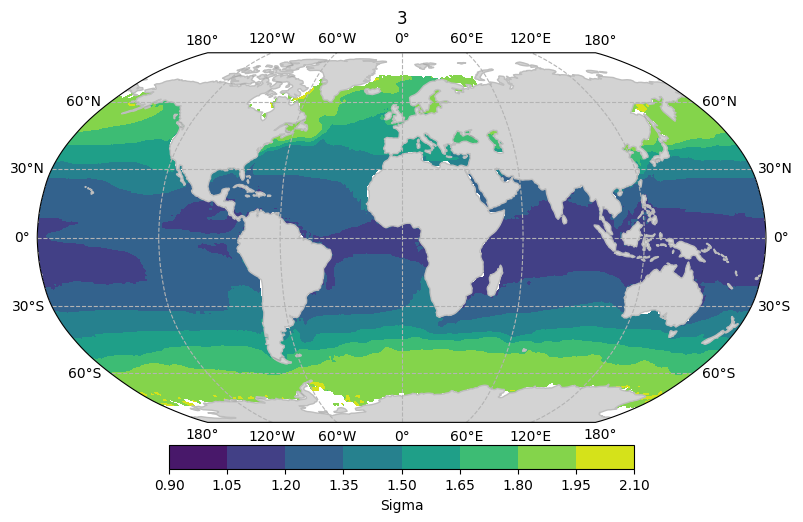

4


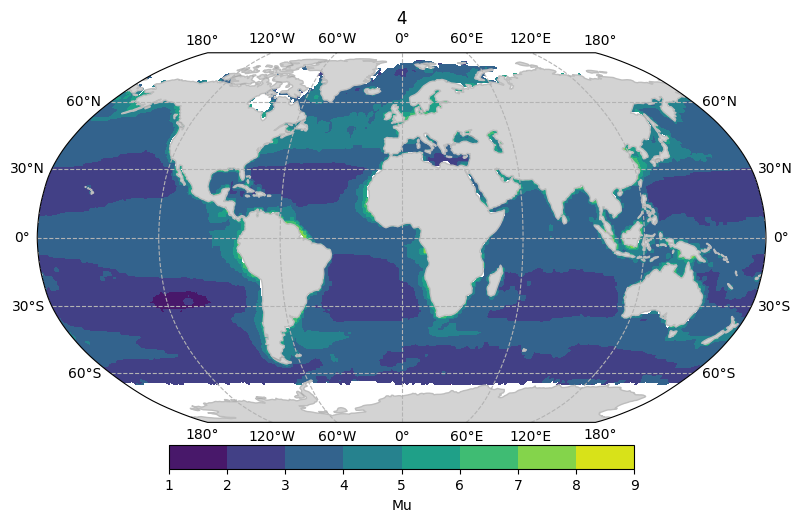

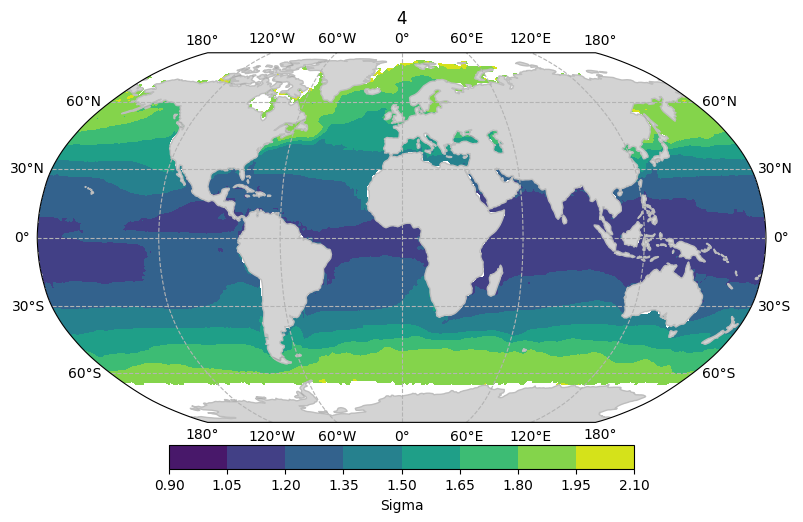

5


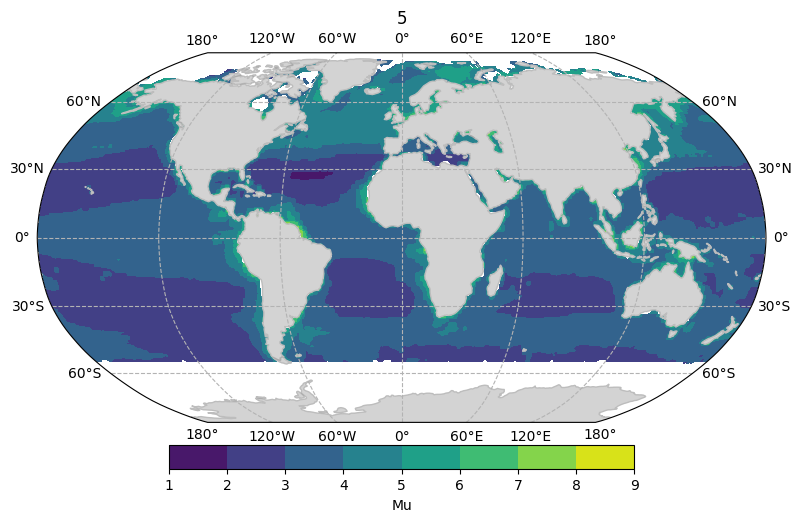

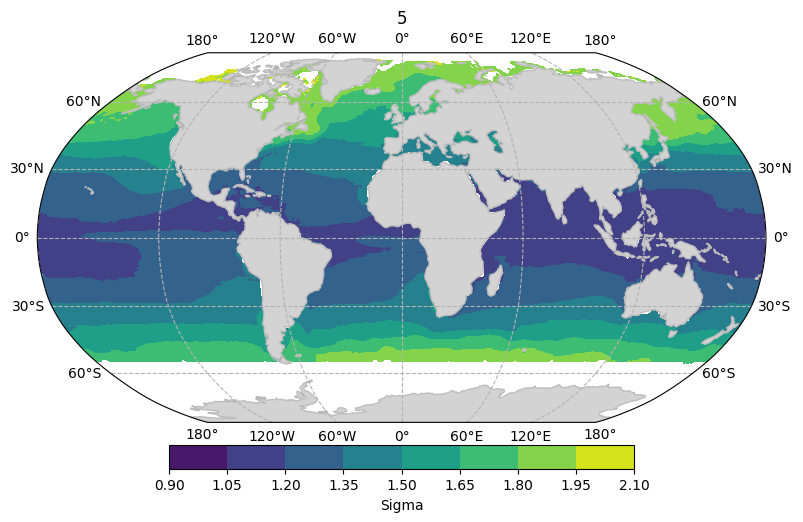

6


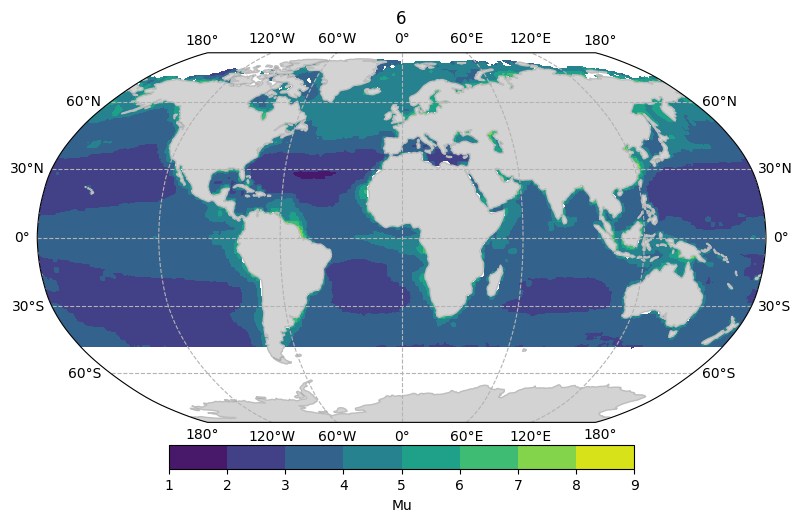

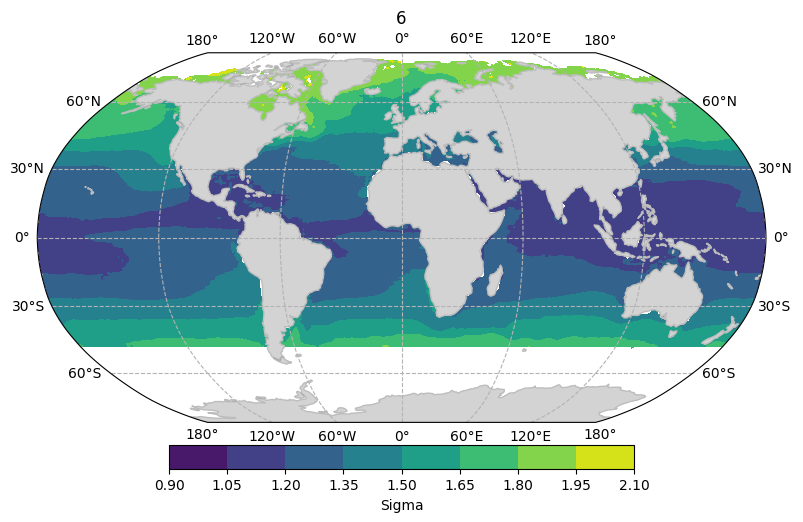

7


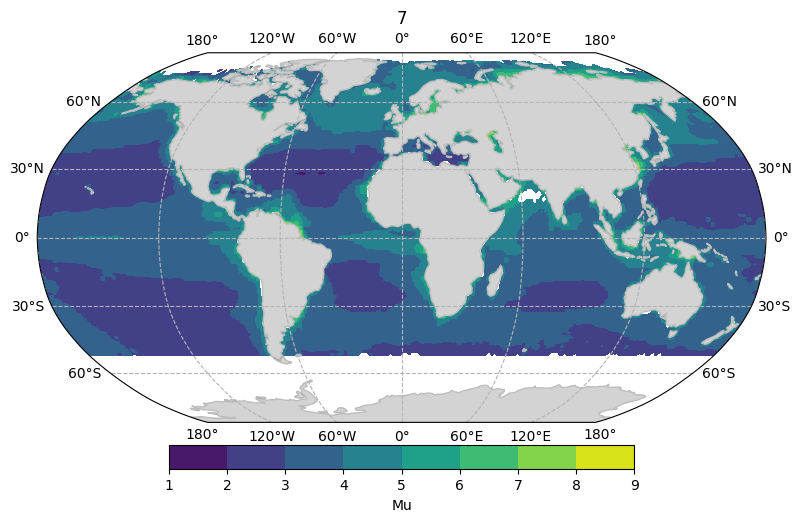

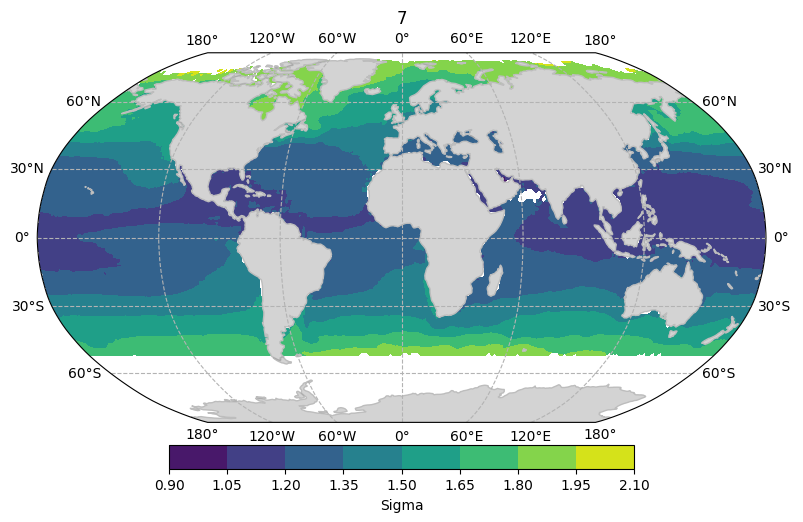

8


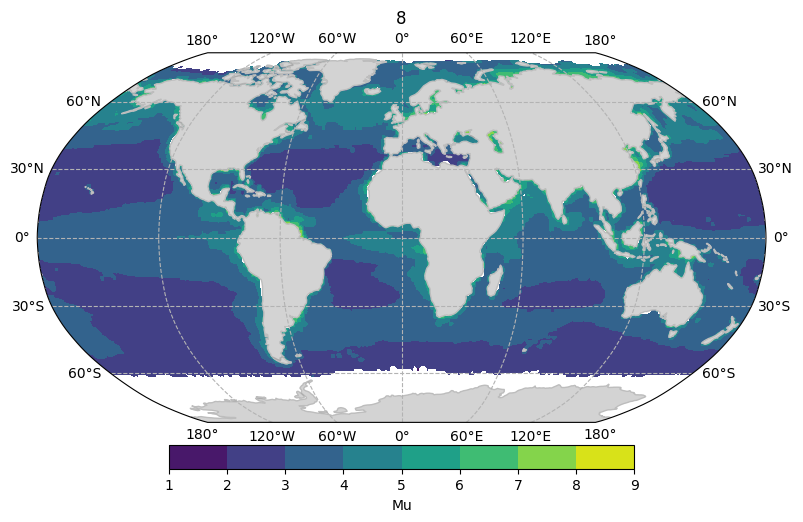

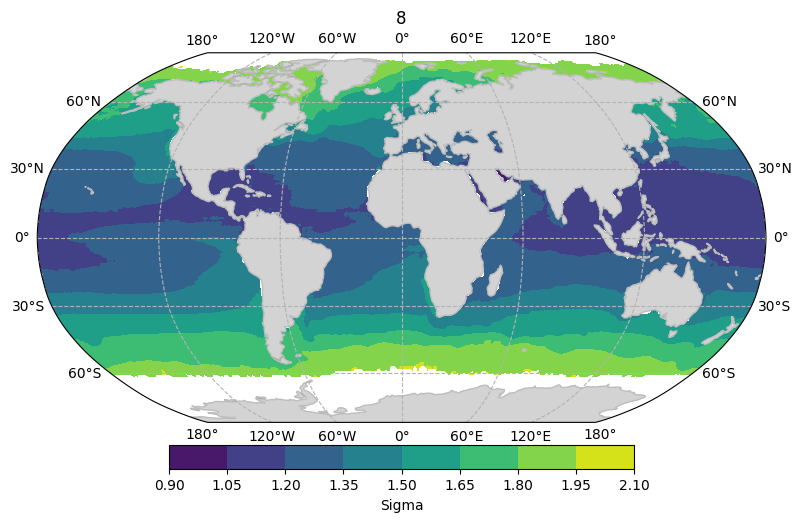

9


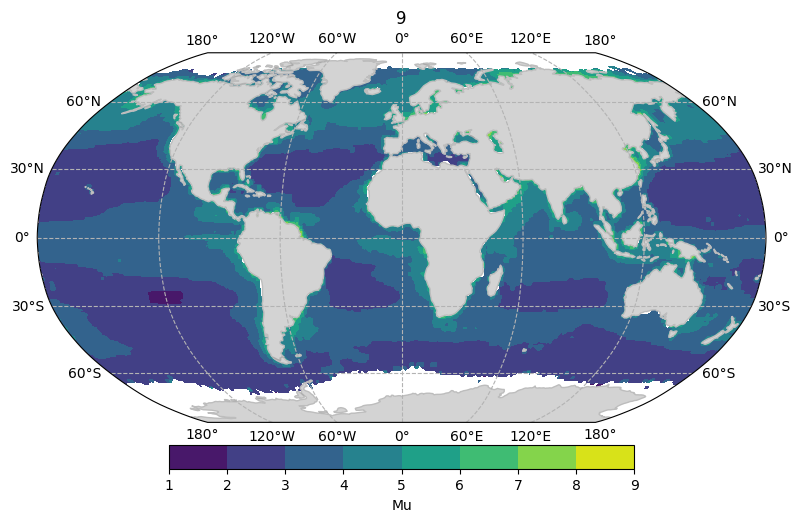

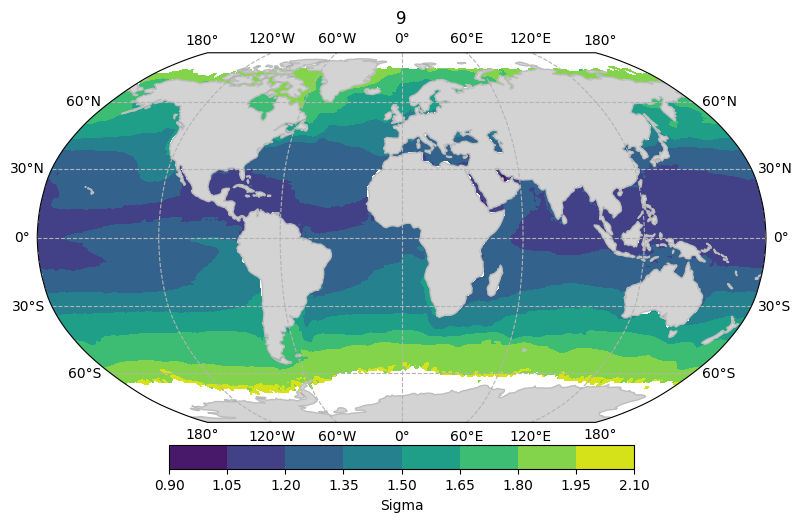

10


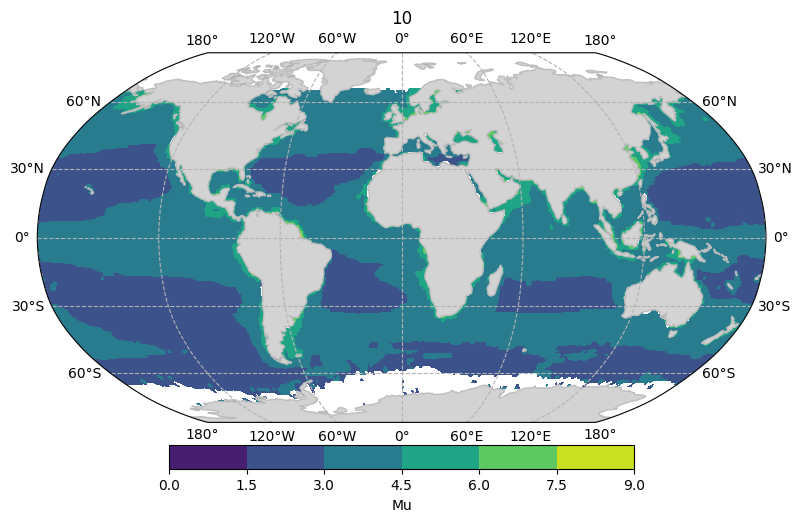

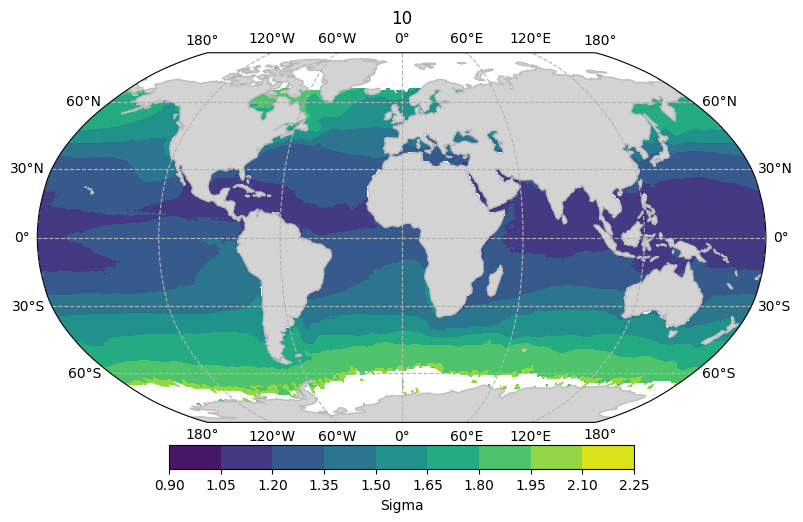

11


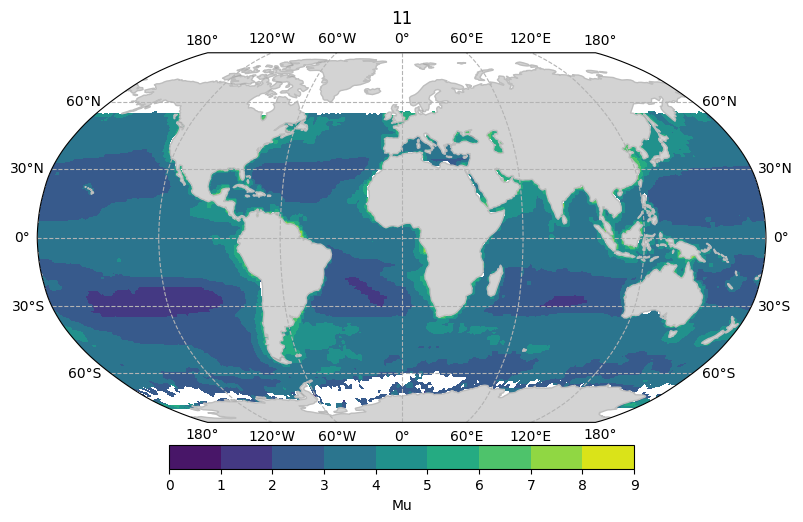

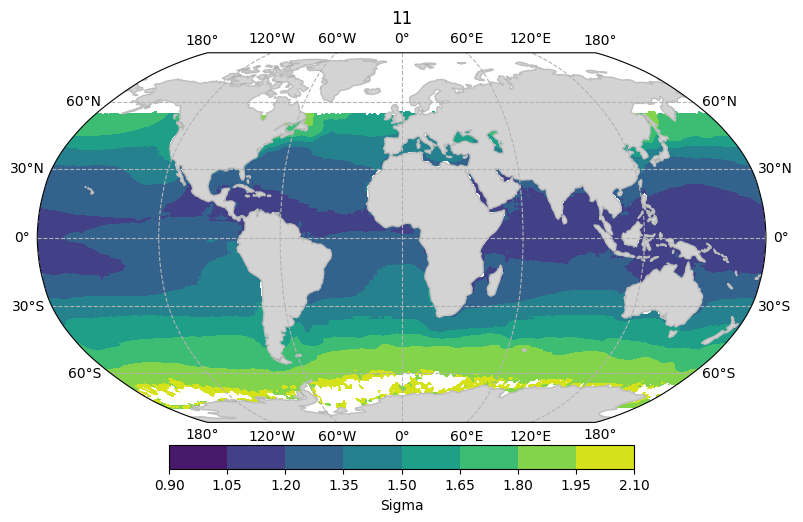

12


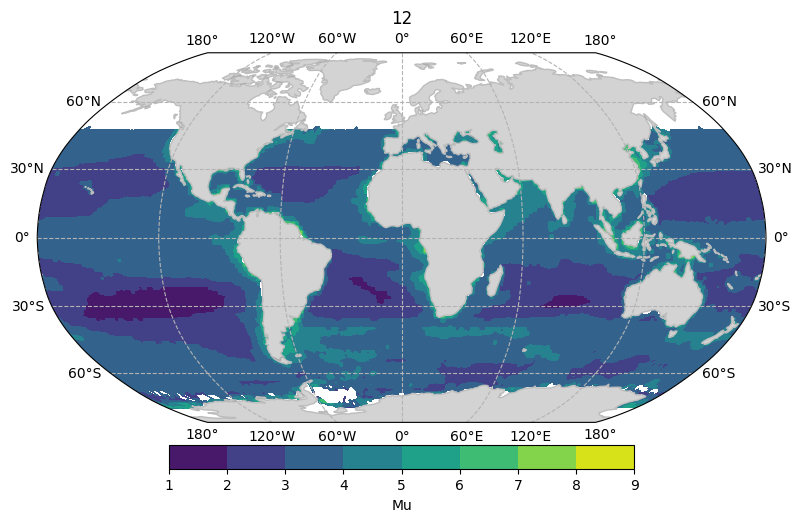

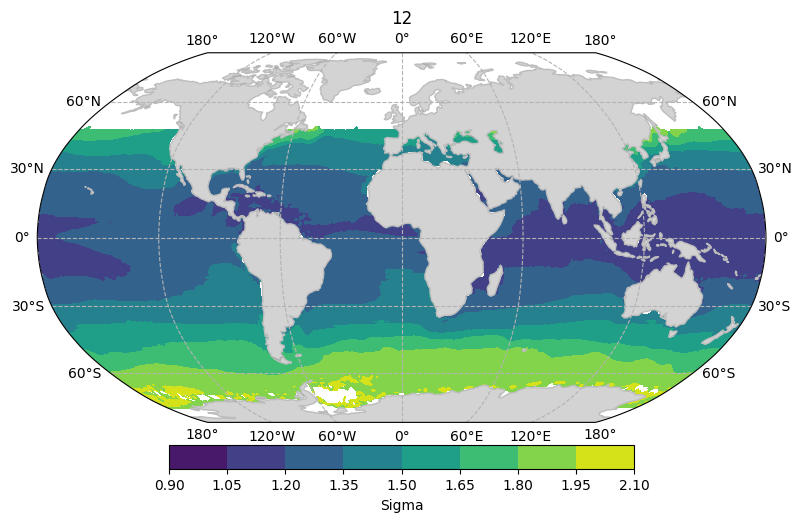

In [ ]:
#TO BE COMPLETED
for m in range(1,13):
    print(m)
    a = m-1

    s = sstm.sel(month = m)
    c = chlam.sel(month = m)
    z = zeum.sel(month = m)

    mumap = (np.mean(betas["beta[1]"])*np.ones((180,360)))+(np.mean(betas["beta[2]"])*s)+ (np.mean(betas["beta[3]"])*c) + (np.mean(betas["beta[4]"])*z)
    sigmap = (np.mean(gammas["gamma[1]"])*np.ones((180,360)))+(np.mean(gammas["gamma[2]"])*s)+ (np.mean(gammas["gamma[3]"])*c) + (np.mean(gammas["gamma[4]"])*z)

    ###############
    fig = plt.figure(figsize=(5, 3))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    ax.set_global()
    ax.coastlines('110m', alpha=0.1)
    ax.gridlines(draw_labels = True, linestyle = "--", color = "#B3B3B3")
    contour = ax.contourf(lons, lats, mumap, transform=ccrs.PlateCarree())

    cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', shrink=0.6, pad=0.05)
    cbar.set_label("Mu")

    land = cfeature.NaturalEarthFeature('physical', 'land', '110m',edgecolor='face', facecolor='lightgrey')
    ax.add_feature(land, zorder=1)

    ax.set_title(m)
    plt.show()


    ################
    fig = plt.figure(figsize=(5, 3))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    ax.set_global()
    ax.coastlines('110m', alpha=0.1)
    ax.gridlines(draw_labels = True, linestyle = "--", color = "#B3B3B3")
    contour = ax.contourf(lons, lats, sigmap, transform=ccrs.PlateCarree())

    cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', shrink=0.6, pad=0.05)
    cbar.set_label("Sigma")

    land = cfeature.NaturalEarthFeature('physical', 'land', '110m',edgecolor='face', facecolor='lightgrey')
    ax.add_feature(land, zorder=1)

    ax.set_title(m)
    plt.show()
